In [1]:
import os
import pandas as pd
import numpy as np
import torch
from PIL import Image
from torchvision.transforms import functional as Func
from torchvision import transforms as T
import matplotlib.pyplot as plt
import shutil

In [32]:
DATA_DIR_PATH = '/home/jmryan/teams/dsc-180a---a14-[88137]/MIMIC_Images/training_data_1/'
MIMIC_PATH = '/home/jmryan/teams/dsc-180a---a14-[88137]/MIMIC_Images/'
ex = '5d54a839-1c5f5156-cb890477-5adcd37d-49d6fda5.png'
df_path = 'dataset.csv'
with_id = 'with_identifiers.csv'
file_path = 'filepaths.pkl'
SIZE = [256,256]

In [34]:
tmp = os.listdir(MIMIC_PATH)

In [36]:
paths = ['training_data_1',
 'training_data_28',
 'training_data_6',
 'training_data_2',
 'training_data_8',
 'training_data_31_316',
 'training_data_5',
 'training_data_7',
 'training_data_30',
 'training_data_4',
 'training_data_9',
 'training_data_3']

In [61]:
target_path = '/home/jmryan/teams/dsc-180a---a14-[88137]/MIMIC_Images/training_data_big/'

In [56]:
for file in os.listdir(MIMIC_PATH):
    if '.png' in file:
        os.remove(MIMIC_PATH + file)

In [57]:
os.listdir(MIMIC_PATH)

['training_data_1',
 'training_data_28',
 'training_data_6',
 'old_zips',
 'training_data_2',
 'training_data_8',
 'training_data_31_316',
 'training_data_5',
 'training_data_7',
 'training_data_big',
 'training_data_30',
 '.ipynb_checkpoints',
 'training_data_4',
 'training_data_9',
 'training_data_3']

In [63]:
i = 0
files = set()
for origin in paths:
    for file in os.listdir(MIMIC_PATH + origin):
        shutil.copy(MIMIC_PATH + origin + '/' + file, target_path + file)

In [49]:
i

20600

In [47]:
os.path.exists(target_path + file)

True

In [67]:
im_names = os.listdir(target_path)

In [75]:
ims_full = pd.DataFrame(im_names, columns=['im_key'])

In [80]:
df['im_key'] = df.path.apply(lambda x: x.split('/')[-1][:-4] + '.png')

In [82]:
full_df = df.merge(ims_full)

In [85]:
full_df['path'] = full_df.im_key.apply(lambda x: target_path + x)

In [88]:
full_df[['path', 'Edema', 'Pleural Effusion', 'im_key']].to_csv(MIMIC_PATH + 'mimic_paths_meta.csv')

In [90]:
pd.read_csv(MIMIC_PATH + 'mimic_paths_meta.csv', index_col=0)

,path,Edema,Pleural Effusion,im_key
0,/home/jmryan/teams/dsc-180a---a14-[88137]/MIMI...,0.0,0.0,6ad03ed1-97ee17ee-9cf8b320-f7011003-cd93b42d.png
1,/home/jmryan/teams/dsc-180a---a14-[88137]/MIMI...,0.0,1.0,5aa15ba6-55f5e96e-39cea686-7c3b28b2-b8c97a88.png
2,/home/jmryan/teams/dsc-180a---a14-[88137]/MIMI...,1.0,1.0,54affd39-8bf24209-232bac8a-df6c277a-398ee8a5.png
3,/home/jmryan/teams/dsc-180a---a14-[88137]/MIMI...,0.0,0.0,0009a9fb-eb905e90-824cad7c-16d40468-007f0038.png
4,/home/jmryan/teams/dsc-180a---a14-[88137]/MIMI...,1.0,1.0,7b25b3ed-e780a527-319cb7b3-02d5d071-f1cddee9.png
...,...,...,...,...
33698,/home/jmryan/teams/dsc-180a---a14-[88137]/MIMI...,1.0,1.0,a29987d8-abd13298-7a067b12-620f9fdb-103ecf53.png
33699,/home/jmryan/teams/dsc-180a---a14-[88137]/MIMI...,1.0,0.0,90cc8b7a-b89b1a56-6e5b0c04-409b50c7-30092d26.png
33700,/home/jmryan/teams/dsc-180a---a14-[88137]/MIMI...,0.0,0.0,518011e2-346dbd44-3e738335-c5006bf8-d69f6b68.png
33701,/home/jmryan/teams/dsc-180a---a14-[88137]/MIMI...,0.0,1.0,1427ad57-5bf4f3e6-90be02f3-d1760987-99d7f2ce.png


In [27]:
cont = '/home/jmryan/teams/dsc-180a---a14-[88137]/MIMIC_Images/content/training_data'

In [94]:
len(os.listdir(cont))

FileNotFoundError: [Errno 2] No such file or directory: '/home/jmryan/teams/dsc-180a---a14-[88137]/MIMIC_Images/content/training_data'

In [2]:
NORMAL_SAVE_PATH = '/home/jmryan/teams/dsc-180a---a14-[88137]/mimic_224_pandas/'

In [3]:
len(os.listdir(NORMAL_SAVE_PATH))

8601

In [12]:
df = pd.read_csv(df_path)

In [14]:
df.groupby('Edema').count()

,Unnamed: 0,path,Pleural Effusion
Edema,,,
0.0,18277,18277,18277
1.0,17426,17426,17426


In [21]:
def change_im(path):
    im = Image.open(path)
    tens = T.ToTensor()
    resize = T.Resize(SIZE, interpolation=T.InterpolationMode.BILINEAR)
    im = tens(resize(im))[0]
    return im

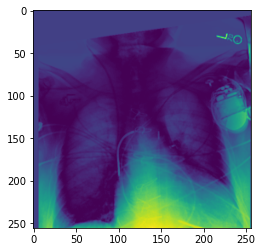

In [24]:
plt.imshow(change_im(DATA_DIR_PATH+ex))

In [26]:
change_im(DATA_DIR_PATH+ex)

torch.Size([256, 256])